# Convergent Cross Mapping
This notebook and package is reproducing the results from [
Detecting Causality in Complex Ecosystems](http://science.sciencemag.org/content/338/6106/496)

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
import seaborn as sns
sns.set_style('ticks')
sns.set_context(context='notebook',font_scale=1.5)
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import skCCM as ccm
import skCCM.data as data

## Work Flow
A coupled logistic map. Here is what we are going to do:

1. Generate the time series
2. Calculate the mutual information of the time series
3. Embed the time series (not going to explore embedding dimension, just lag)
4. Analyze forecast skill for a range of library lengths

### 1. Generate the time series

In [22]:
rx1 = 3.72 #determines chaotic behavior of the x1 series
rx2 = 3.72 #determines chaotic behavior of the x2 series
b12 = 0.2 #Influence of x1 on x2
b21 = 0.01 #Influence of x2 on x1
ts_length = 10000
x1,x2 = data.coupled_logistic(rx1,rx2,b12,b21,ts_length)

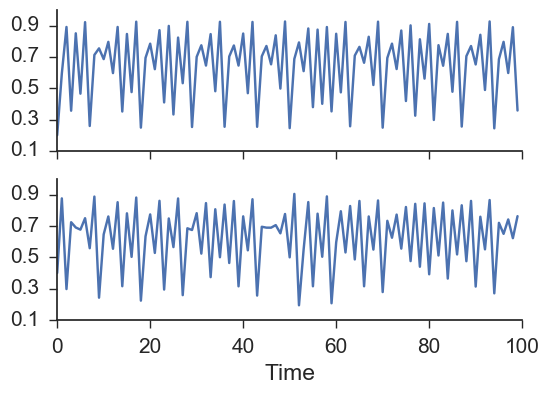

In [23]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(x1[0:100])
ax[1].plot(x2[0:100])
ax[0].set_yticks([.1,.3,.5,.7,.9])
ax[1].set_xlabel('Time')
sns.despine()

In [24]:
#fig.savefig('../figures/coupled_logistic.png',bbox_inches='tight')

### 2. Calculate the mutual information

In [25]:
e1 = ccm.Embed(x1)
e2 = ccm.Embed(x2)

In [26]:
mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

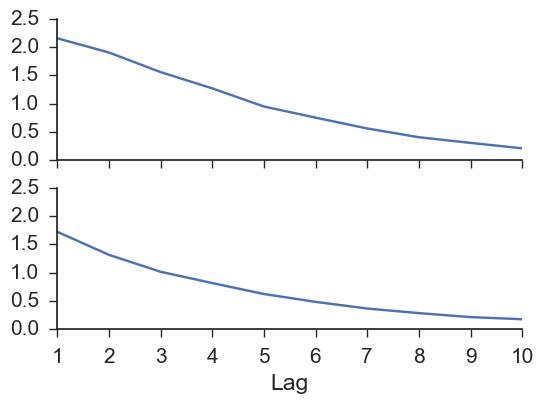

In [27]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [28]:
#fig.savefig('../figures/mutual_info.png',bbox_inches='tight')

### 3. Embed the time series

In [29]:
lag = 1
embed = 2
X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

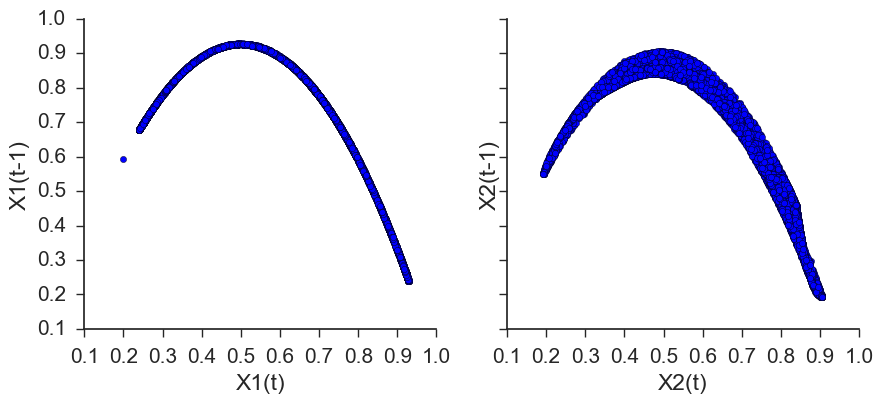

In [30]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [31]:
#fig.savefig('../figures/x_embedded.png',bbox_inches='tight')

### 4. Forecast skill as a function of library length
Same legend as above.

In [32]:
CCM = ccm.CCM()

### Split it into a testing set and training set

In [33]:
from skCCM.utilities import train_test_split

In [34]:
x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

In [70]:
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/500, dtype='int')

In [65]:
import time

In [66]:
x1tr.shape

(7499, 2)

In [78]:
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

ut.in_library: 0.7568
ut.in_library: 0.7616
ut.in_library: 0.7262
ut.in_library: 0.8162
ut.in_library: 0.7991
ut.in_library: 0.6696
ut.in_library: 0.6855
ut.in_library: 0.7409
ut.in_library: 0.7223
ut.in_library: 0.7637
ut.in_library: 0.7249
ut.in_library: 0.7344
ut.in_library: 0.6995
ut.in_library: 0.7452
ut.in_library: 0.7317
ut.in_library: 0.7536
ut.in_library: 0.7398
ut.in_library: 0.7325
ut.in_library: 0.7134
ut.in_library: 0.7036
ut.in_library: 0.7163
ut.in_library: 0.7023
ut.in_library: 0.6985
ut.in_library: 0.8453
ut.in_library: 0.7469
ut.in_library: 0.7336
ut.in_library: 0.7067
ut.in_library: 0.6852
ut.in_library: 0.7769
ut.in_library: 0.8312
ut.in_library: 0.7606
ut.in_library: 0.7393
ut.in_library: 0.7091
ut.in_library: 0.7052
ut.in_library: 0.7097
ut.in_library: 0.7051
ut.in_library: 0.7079
ut.in_library: 0.7484
ut.in_library: 0.8959
ut.in_library: 0.8423
ut.in_library: 0.7679
ut.in_library: 0.8224
ut.in_library: 0.7559
ut.in_library: 0.7114
ut.in_library: 0.8026
ut.in_libr

In [63]:
2500/4

625.0

In [77]:
CCM.fit(x1tr,x2tr)
x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)

In [79]:
T2 = []
for i in range(5):
    t0 = time.time()
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict_2(x1te, x2te,lib_lengths=lib_lens)
    t1 = time.time()
    T2.append(t1-t0)

In [75]:
T4 = []
for i in range(5):
    t0 = time.time()
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    t1 = time.time()
    T4.append(t1-t0)

KeyboardInterrupt: 

In [44]:
T1 = []
for i in range(10):
    t0 = time.time()
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    t1 = time.time()
    T1.append(t1-t0)

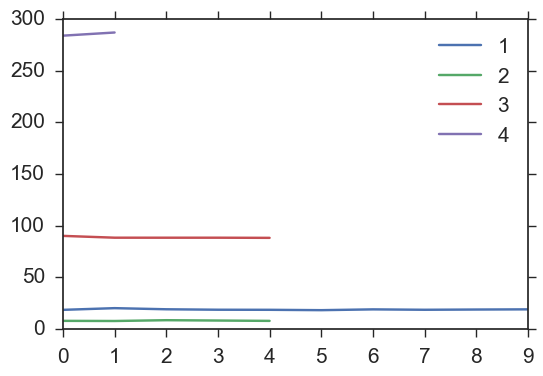

In [80]:
plt.plot(T1,label=1)
plt.plot(T2,label=2)
plt.plot(T3,label=3)
plt.plot(T4,label=4)
plt.legend()

### Test as a function of training size

In [47]:
len(x1tr)

7499

In [ ]:
len_tr = len(x1tr)
lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')

In [ ]:
T1 = []
for i in range(10):
    
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    
    t0 = time.time()
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict(x1te, x2te,lib_lengths=lib_lens)
    t1 = time.time()
    T1.append(t1-t0)

In [ ]:
T2 = []
for i in range(10):
    
    len_tr = len(x1tr)
    lib_lens = np.arange(10, len_tr, len_tr/20, dtype='int')
    
    t0 = time.time()
    CCM.fit(x1tr,x2tr)
    x1p, x2p = CCM.predict_2(x1te, x2te,lib_lengths=lib_lens)
    t1 = time.time()
    T2.append(t1-t0)

In [67]:
lib_lens

array([ 10,  47,  84, 121, 158, 195, 232, 269, 306, 343, 380, 417, 454,
       491, 528, 565, 602, 639, 676, 713])

In [68]:
sc1,sc2 = CCM.score(how='score')

In [69]:
sc2

[0.0025513350421907657,
 0.070907118378621722,
 0.22451603952477273,
 0.2027705371640357,
 0.10213117236190764,
 0.14941566359817449,
 0.22109331732695245,
 0.16485540289279199,
 0.10393696810759245,
 0.12889457107691396,
 0.091618165708761884,
 0.12861839474471023,
 0.15338442431907756,
 0.16163379270191308,
 0.1513587373687621,
 0.22498530190204502,
 0.20995901287768401,
 0.24313052912396019,
 0.23594319466685135,
 0.29411626140969105]

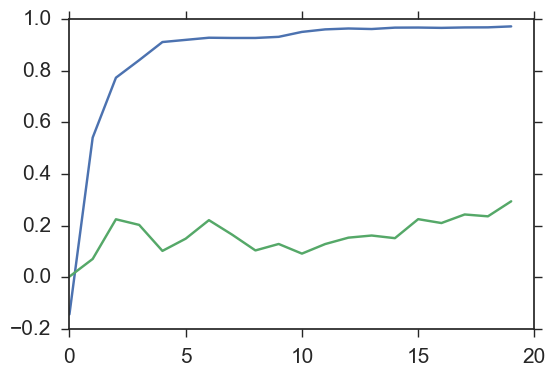

In [70]:
plt.plot(sc1)
plt.plot(sc2)

In [52]:
x1p[0]

array([[ 0.82875608,  0.49881763],
       [ 0.54005378,  0.7605454 ],
       [ 0.59465776,  0.23452187],
       [ 0.34042383,  0.82735473],
       [ 0.82618107,  0.50421594],
       [ 0.51639773,  0.64042264],
       [ 0.61260047,  0.34513309],
       [ 0.26782064,  0.59490404],
       [ 0.61168172,  0.42035462],
       [ 0.50907143,  0.90390878],
       [ 0.92378275,  0.25664714],
       [ 0.23011161,  0.62976142],
       [ 0.69620939,  0.65865331],
       [ 0.67590934,  0.80238347],
       [ 0.80068656,  0.58526906],
       [ 0.55847754,  0.85433728],
       [ 0.89676276,  0.33172704],
       [ 0.27414753,  0.73682051],
       [ 0.74328767,  0.69918426],
       [ 0.69227388,  0.78616411],
       [ 0.78652957,  0.62074834],
       [ 0.59123611,  0.89087556],
       [ 0.90724833,  0.30796396],
       [ 0.28944251,  0.76056909],
       [ 0.77316083,  0.64098674],
       [ 0.63178066,  0.85971282],
       [ 0.85969702,  0.44557218],
       [ 0.44050549,  0.9129338 ],
       [ 0.91224123,

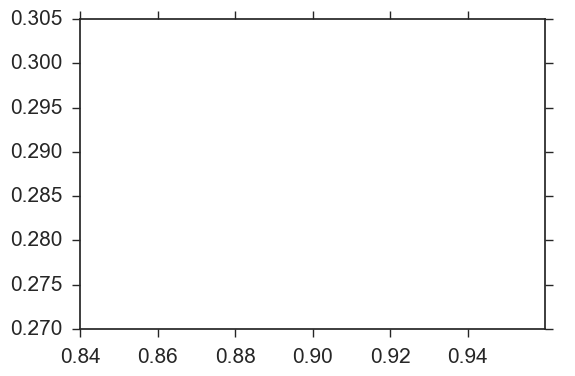

In [47]:
plt.plot(sc1,sc2)

In [32]:
CCM.dist1.shape

(250, 749)

In [37]:
CCM.ind1.shape

(250, 749)

In [38]:
CCM.ind1

array([[414, 442, 735, ..., 378, 440,   0],
       [415, 736, 443, ..., 411, 439, 377],
       [416, 737, 444, ..., 370, 495,  59],
       ..., 
       [504, 721, 248, ..., 411, 439, 377],
       [505, 722, 239, ..., 440, 378,   0],
       [723, 506, 528, ..., 411, 439, 377]])

In [ ]:
ccm.utilities.in_library_len()

In [34]:
CCM.X1_train.shape

(749, 2)

In [35]:
CCM.X1_test.shape

(250, 2)

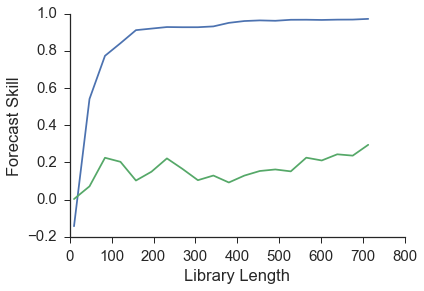

In [18]:
fig,ax = plt.subplots()
ax.plot(lib_lens,sc1,label='X1 xmap X2')
ax.plot(lib_lens,sc2, label='X2 xmap X1')
ax.set_xlabel('Library Length')
ax.set_ylabel('Forecast Skill')
sns.despine()

In [19]:
#fig.savefig('../figures/xmap_lib_len.png',bbox_inches='tight')

### For a single library length

In [20]:
lib_len = [500] #must be a list
sc1, sc2 = CCM.predict_causation(x1tr, x1te, x2tr, x2te, lib_len)

In [21]:
print("sc1:",sc1)
print("sc2:",sc2)

sc1: [ 0.96133667]
sc2: [ 0.15605362]


## Reproducing the plot from the paper
The paper explores different values for b12 and b21 in Figure 3B.

In [22]:
X1.shape

(999, 2)

In [23]:
rx1 = 3.7 #determines chaotic behavior of the x1 series
rx2 = 3.7 #determines chaotic behavior of the x2 series

ts_length = 1000

#variables for embedding
lag = 1
embed = 2

CCM = ccm.ccm() #intitiate the ccm object

#store values
num_b = 20 #number of bs to test
sc1_store = np.empty((num_b,num_b))
sc2_store = np.empty((num_b,num_b))

#values over which to test
max_b = .4 #maximum b values
b_range = np.linspace(0,max_b,num=num_b)

In [24]:
#loop through b values for b12 and b21
for ii,b12 in enumerate(b_range):
    for jj, b21 in enumerate(b_range):
        
        x1,x2 = data.coupled_logistic(rx1,rx2,b12,b21,ts_length)
        
        em_x1 = ccm.embed(x1)
        em_x2 = ccm.embed(x2)
        
        X1 = em_x1.embed_vectors_1d(lag,embed)
        X2 = em_x2.embed_vectors_1d(lag,embed)
        
        x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)
        
        sc1, sc2 = CCM.predict_causation(x1tr, x1te, x2tr, x2te,[500])
        
        sc1_store[ii,jj] = sc1 #only the one prediction out
        sc2_store[ii,jj] = sc2
        
sc_diff = sc2_store-sc1_store

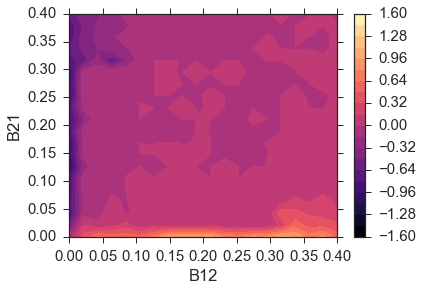

In [25]:
fig,ax = plt.subplots()
v = np.linspace(-1.6,1.6,21)
cax = ax.contourf(b_range,b_range,sc_diff,v,cmap='magma')
fig.colorbar(cax,ticks=v[::2])
ax.set_xlabel('B12')
ax.set_ylabel('B21')

In [26]:
#fig.savefig('../figures/xmap_changingB.png',bbox_inches='tight')

## Randomly forced

In [27]:
rx2 = 3.72 #determines chaotic behavior of the x2 series
b12 = .2 #Influence of x1 on x2

ts_length = 1000
x1,x2 = data.driven_rand_logistic(rx2,b12,ts_length)

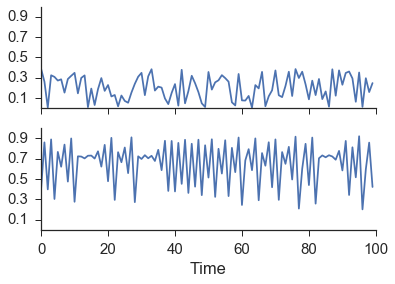

In [28]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(x1[0:100])
ax[1].plot(x2[0:100])
ax[0].set_yticks([.1,.3,.5,.7,.9])
ax[1].set_xlabel('Time')
sns.despine()

In [29]:
e1 = ccm.embed(x1)
e2 = ccm.embed(x2)

In [30]:
mi1 = e1.mutual_information(10)
mi2 = e2.mutual_information(10)

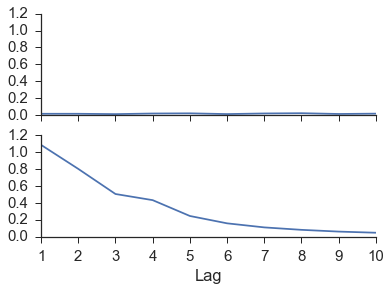

In [31]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [32]:
lag = 1
embed = 3

X1 = e1.embed_vectors_1d(lag,embed)
X2 = e2.embed_vectors_1d(lag,embed)

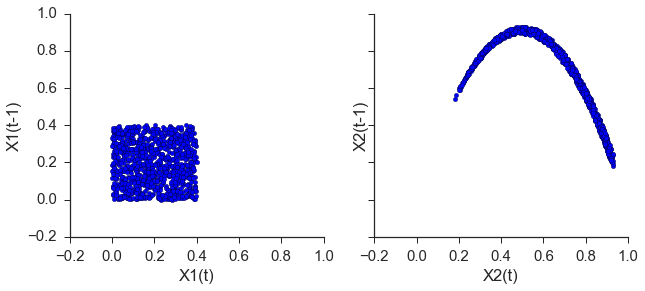

In [33]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [34]:
CCM = ccm.ccm()

In [35]:
X1.shape

(998, 3)

In [36]:
lib_lens = np.arange(10,ts_length,ts_length/20,dtype='int')

x1tr, x1te, x2tr, x2te = train_test_split(X1,X2, percent=.75)

sc1, sc2 = CCM.predict_causation(x1tr, x1te, x2tr, x2te,lib_lens)

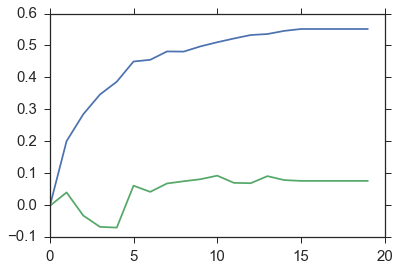

In [37]:
plt.plot(sc1)
plt.plot(sc2)

## Periodic Forcing

In [38]:
rx2 = 3.72 #determines chaotic behavior of the x2 series
b12 = .5 #Influence of x1 on x2

ts_length = 1000
x1,x2 = data.driving_sin(rx2,b12,ts_length)

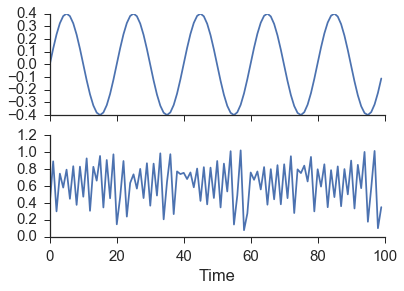

In [39]:
fig,ax = plt.subplots(nrows=2,sharex=True)
ax[0].plot(x1[0:100])
ax[1].plot(x2[0:100])
ax[1].set_xlabel('Time')
sns.despine()

In [40]:
em_x1 = ccm.embed(x1)
em_x2 = ccm.embed(x2)

In [41]:
mi1 = em_x1.mutual_information(10)
mi2 = em_x2.mutual_information(10)

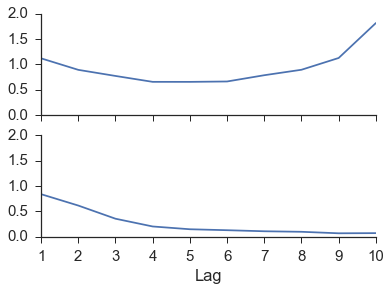

In [42]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [43]:
lag1 = 4
lag2 = 1
embed = 3

X1 = em_x1.embed_vectors_1d(lag1,embed)
X2 = em_x2.embed_vectors_1d(lag2,embed)

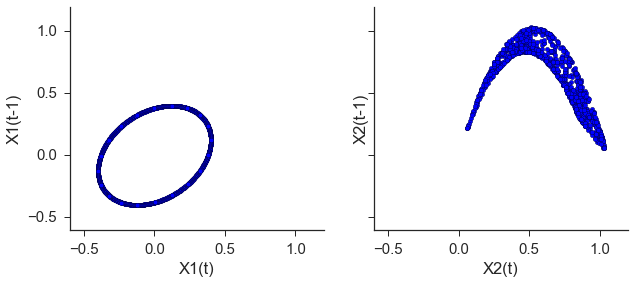

In [44]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [45]:
CCM = ccm.ccm()

In [46]:
X2.shape

(998, 3)

In [47]:
print("X1 xmap X2:", sc1)
print("X2 xmap X1:", sc2)

X1 xmap X2: [-0.00392169  0.19994526  0.28450109  0.34659078  0.38644699  0.44977397
  0.45510745  0.48132646  0.48083796  0.49723929  0.5101393   0.52192703
  0.53279656  0.53595407  0.54576827  0.55169028  0.55169028  0.55169028
  0.55169028  0.55169028]
X2 xmap X1: [-0.00302837  0.03913796 -0.03349662 -0.06894004 -0.07110764  0.06029848
  0.04098114  0.06725904  0.07417394  0.08062177  0.09174646  0.06914174
  0.0681219   0.09026979  0.07789655  0.07534586  0.07534586  0.07534586
  0.07534586  0.07534586]


In [48]:
lib_lens = np.arange(10,ts_length,ts_length/20,dtype='int')
sc1, sc2 = CCM.predict_causation(X1[:500],X1[500:900],X2[:500],X2[500:900],lib_lens)

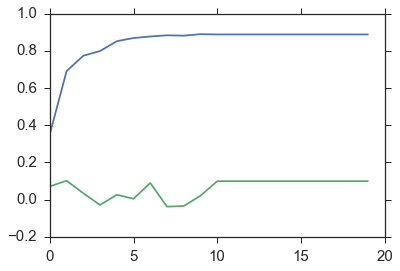

In [49]:
plt.plot(sc1)
plt.plot(sc2)

## Lagged Coupled Logistic

In [50]:
rx1 = 3.72 #determines chaotic behavior of the x1 series
rx2 = 3.72 #determines chaotic behavior of the x2 series
b12 = 0.01 #Influence of x1 on x2
b21 = 0.3 #Influence of x2 on x1
ts_length = 8000
x1,x2 = data.lagged_coupled_logistic(rx1,rx2,b12,b21,ts_length)

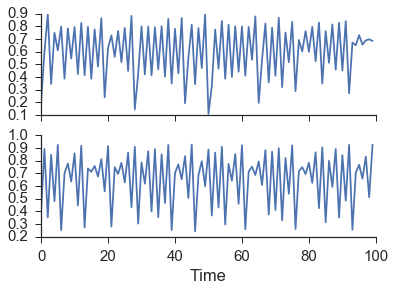

In [51]:
fig,ax = plt.subplots(nrows=2,sharex=True)
ax[0].plot(x1[0:100])
ax[1].plot(x2[0:100])
ax[1].set_xlabel('Time')
sns.despine()

In [52]:
em_x1 = ccm.embed(x1)
em_x2 = ccm.embed(x2)

In [53]:
mi1 = em_x1.mutual_information(10)
mi2 = em_x2.mutual_information(10)

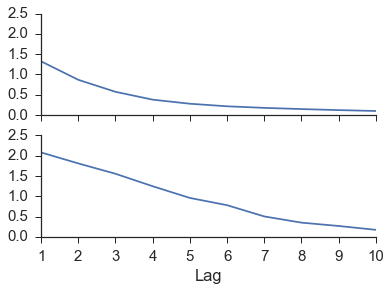

In [54]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [55]:
lag1 = 4
lag2 = 1
embed = 3

X1 = em_x1.embed_vectors_1d(lag1,embed)
X2 = em_x2.embed_vectors_1d(lag2,embed)

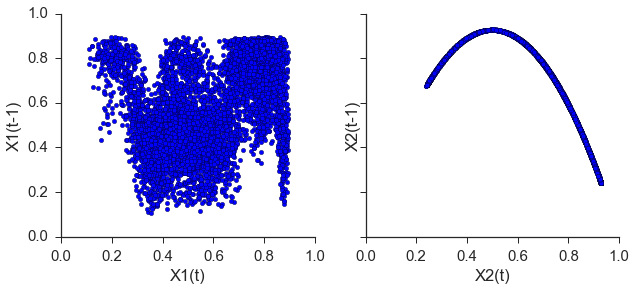

In [56]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [57]:
CCM = ccm.ccm(score_metric='corrcoef')

In [58]:
lib_lens = np.arange(10,ts_length/2,ts_length/20,dtype='int')
sc1, sc2 = CCM.predict_causation(X1[:5000],X1[5000:7500],X2[:5000],X2[5000:7500],lib_lens)

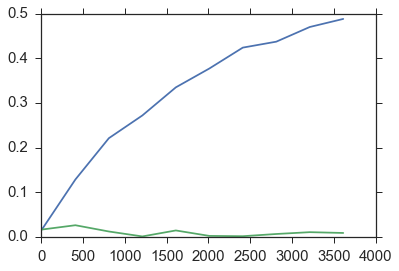

In [59]:
plt.plot(lib_lens,sc1)
plt.plot(lib_lens,sc2)

## Random Linearly Increasing

In [60]:
ts_length=1000
x1 = np.random.randn(ts_length,) + np.linspace(0,25,ts_length)
x2 = np.random.randn(ts_length,) + np.linspace(0,10,ts_length)

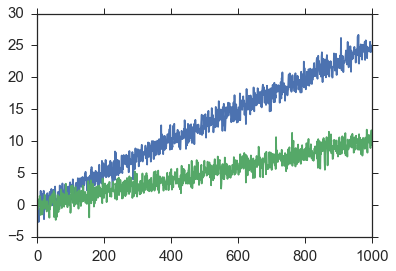

In [61]:
plt.plot(x1)
plt.plot(x2)

In [62]:
em_x1 = ccm.embed(x1)
em_x2 = ccm.embed(x2)

In [63]:
mi1 = em_x1.mutual_information(20)
mi2 = em_x2.mutual_information(20)

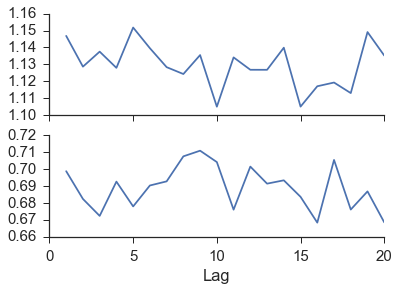

In [64]:
fig,ax = plt.subplots(nrows=2,sharex=True)
ax[0].plot(np.arange(1,21),mi1)
ax[1].plot(np.arange(1,21),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [65]:
lag1 = 2
lag2 = 2
embed = 8

X1 = em_x1.embed_vectors_1d(lag1,embed)
X2 = em_x2.embed_vectors_1d(lag2,embed)

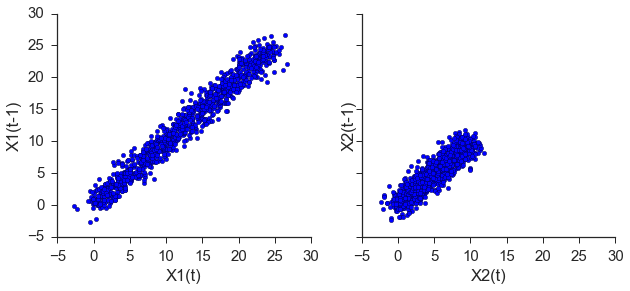

In [66]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [67]:
CCM = ccm.ccm(score_metric='corrcoef')

In [68]:
X1.shape

(986, 8)

In [69]:
lib_lens = np.arange(10,len(X1)/2,len(X1)/2/20,dtype='int')
sc1, sc2 = CCM.predict_causation(X1[:700],X1[700:],X2[:700],X2[700:],lib_lens)

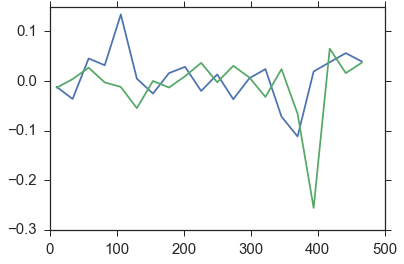

In [70]:
plt.plot(lib_lens,sc1)
plt.plot(lib_lens,sc2)

### Cosine and Sine Waves

In [71]:
ts_length=50
x1 = np.random.randn(ts_length,) + 10*np.sin(np.linspace(0,10*np.pi,ts_length))
x2 = np.random.randn(ts_length,) + 20*np.cos(np.linspace(0,10*np.pi,ts_length))

#x1[x1<0] = np.random.randn(np.sum(x1<0),)
#x2[x2<0] = np.random.randn(np.sum(x2<0),)

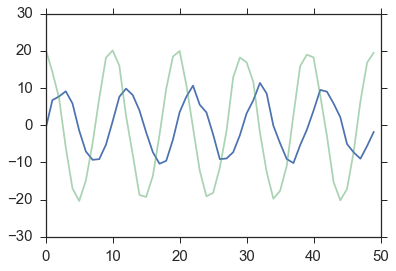

In [72]:
plt.plot(x1)
plt.plot(x2,alpha=.5)

In [73]:
em_x1 = ccm.embed(x1)
em_x2 = ccm.embed(x2)
mi1 = em_x1.mutual_information(10)
mi2 = em_x2.mutual_information(10)

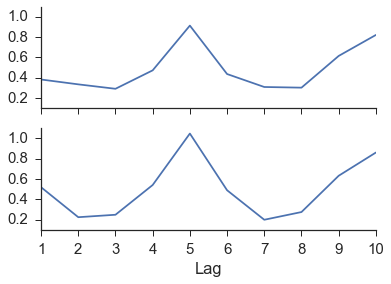

In [74]:
fig,ax = plt.subplots(nrows=2,sharex=True,sharey=True)
ax[0].plot(np.arange(1,11),mi1)
ax[1].plot(np.arange(1,11),mi2)
ax[1].set_xlabel('Lag')
sns.despine()

In [75]:
lag1 = 2
lag2 = 2
embed = 4

X1 = em_x1.embed_vectors_1d(lag1,embed)
X2 = em_x2.embed_vectors_1d(lag2,embed)

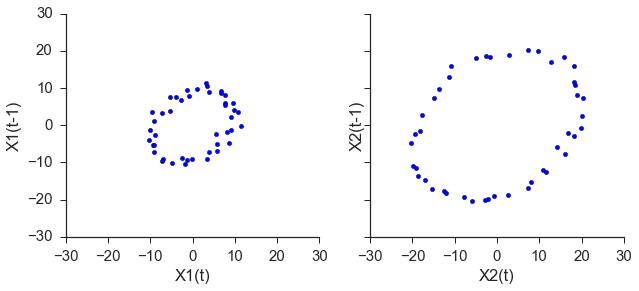

In [76]:
fig,ax = plt.subplots(ncols=2,sharey=True,sharex=True,figsize=(10,4)) 
ax[0].scatter(X1[:,0],X1[:,1])
ax[1].scatter(X2[:,0],X2[:,1])
ax[0].set_xlabel('X1(t)')
ax[0].set_ylabel('X1(t-1)')
ax[1].set_xlabel('X2(t)')
ax[1].set_ylabel('X2(t-1)')
sns.despine()

In [77]:
X1.shape

(44, 4)

In [78]:
CCM = ccm.ccm(score_metric='corrcoef')

In [79]:
x1_len = len(X1)

In [80]:
x1tr, x1te, x2tr, x2te = ccm.utilities.train_test_split(X1,X2)

In [81]:
lib_lens

array([ 10,  34,  58,  82, 106, 130, 154, 178, 202, 226, 250, 274, 298,
       322, 346, 370, 394, 418, 442, 466])

In [82]:
lib_lens = np.arange(5,len(x1tr)/2,len(x1tr)/20,dtype='int')
sc1, sc2 = CCM.predict_causation(x1tr, x1te, x2tr, x2te,lib_lens)

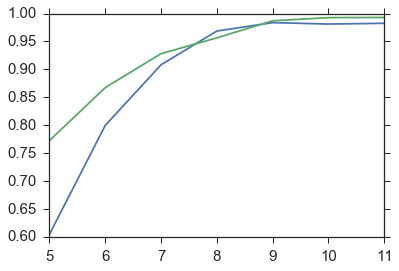

In [83]:
plt.plot(lib_lens,sc1)
plt.plot(lib_lens,sc2)

### Brown Noise

seed = 11, produces small variance in x2 and large variance in x1

In [84]:
def brown_noise_gen(ts_length,seed):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    np.random.seed(seed)
    x1[0] = np.random.randn()
    x2[0] = np.random.randn()
    for ii in range(ts_length-1):
        x1[ii+1]  = np.random.randn() + x1[ii] 
        x2[ii+1] = np.random.randn() + x2[ii]
    
    return x1,x2
    

In [85]:
#fig,axes = plt.subplots(10,10,figsize=(20,20))
#ax = axes.ravel()
ts_length=2000
iterations = 1000
S = np.zeros(iterations)
lib_lens = np.arange(50,ts_length/2,ts_length/2/20,dtype='int')
sc1 = np.zeros((iterations,len(lib_lens)))
sc2 = np.zeros((iterations,len(lib_lens)))
x1_store = np.zeros((iterations,2000))
x2_store = np.zeros((iterations,2000))
for ii in range(iterations):
    
    
    #np.random.seed(np.random.randint(0,10000,dtype='int'))
    #r_seed = np.random.randint(0,10000,dtype='int')
    x1,x2 = brown_noise_gen(2000,ii)

    x1_store[ii,:] = x1
    x2_store[ii,:] = x2
    
    em_x1 = ccm.embed(x1)
    em_x2 = ccm.embed(x2)
    lag1 = 20
    lag2 = 20
    embed = 3

    X1 = em_x1.embed_vectors_1d(lag1,embed)
    X2 = em_x2.embed_vectors_1d(lag2,embed)
    
    
    x1tr, x1te, x2tr, x2te = ccm.utilities.train_test_split(X1,X2,percent=.5)
    CCM = ccm.ccm(score_metric='corrcoef')
    
    sc1[ii,:], sc2[ii,:] = CCM.predict_causation(x1tr, x1te, x2tr, x2te,lib_lens)
    S[ii] = np.sum(sc1[ii,:]-sc2[ii,:])
    

In [86]:
X1.shape

(1960, 3)

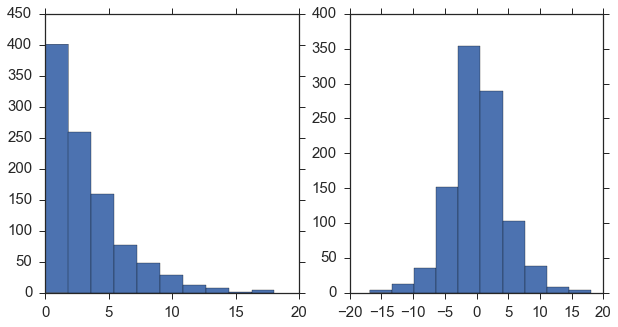

In [87]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
ax[0].hist(np.abs(S))
ax[1].hist(S);

In [88]:
#fig.savefig('../figures/ccm_hist.png',bbox_inches='tight')

In [89]:
top_vals = np.argsort(np.abs(S))[::-1]
print(top_vals[0:10])

[ 26 369 306 424 311 697 714 149 687 575]


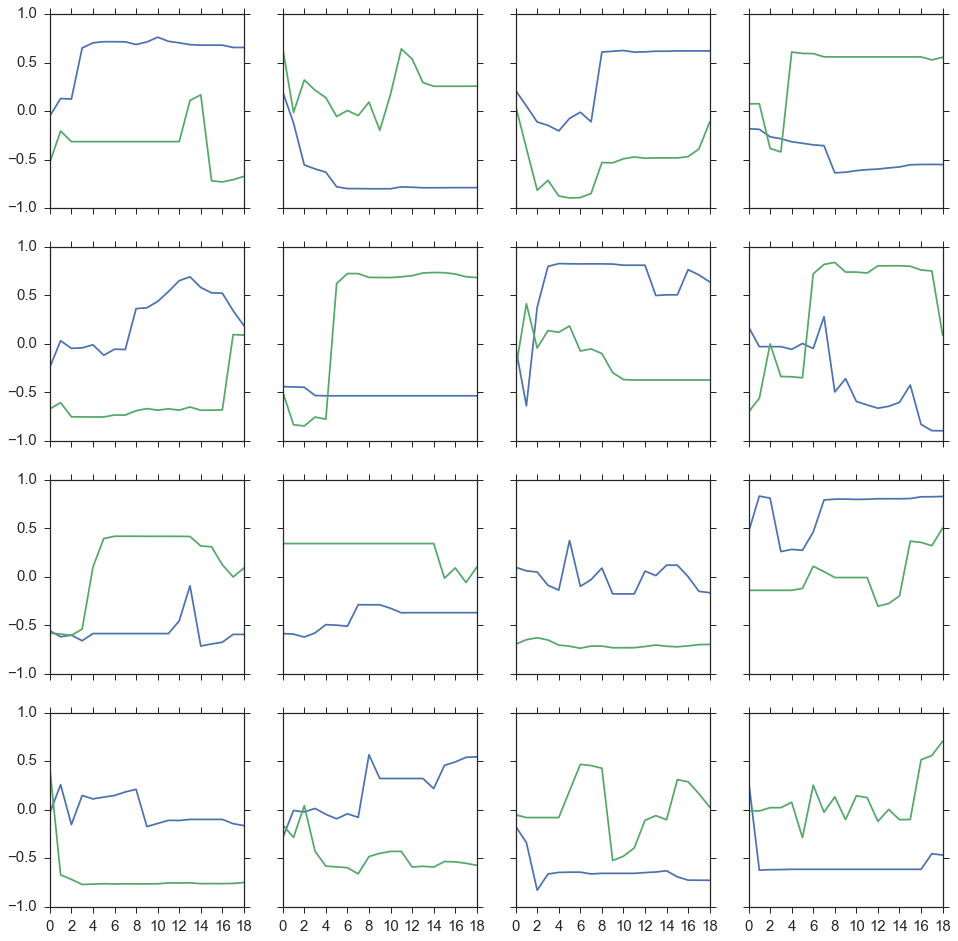

In [90]:
fig,axes = plt.subplots(4,4,figsize=(16,16),sharex=True,sharey=True)
ax = axes.ravel()

for ii in range(16):
    ax[ii].plot(sc1[top_vals[ii],:])
    ax[ii].plot(sc2[top_vals[ii],:])
    ax[ii].set_ylim(-1,1)

In [91]:
#fig.savefig('../figures/top_ccm.png',bbox_inches='tight')

### plot the top eight and their corresponding ts

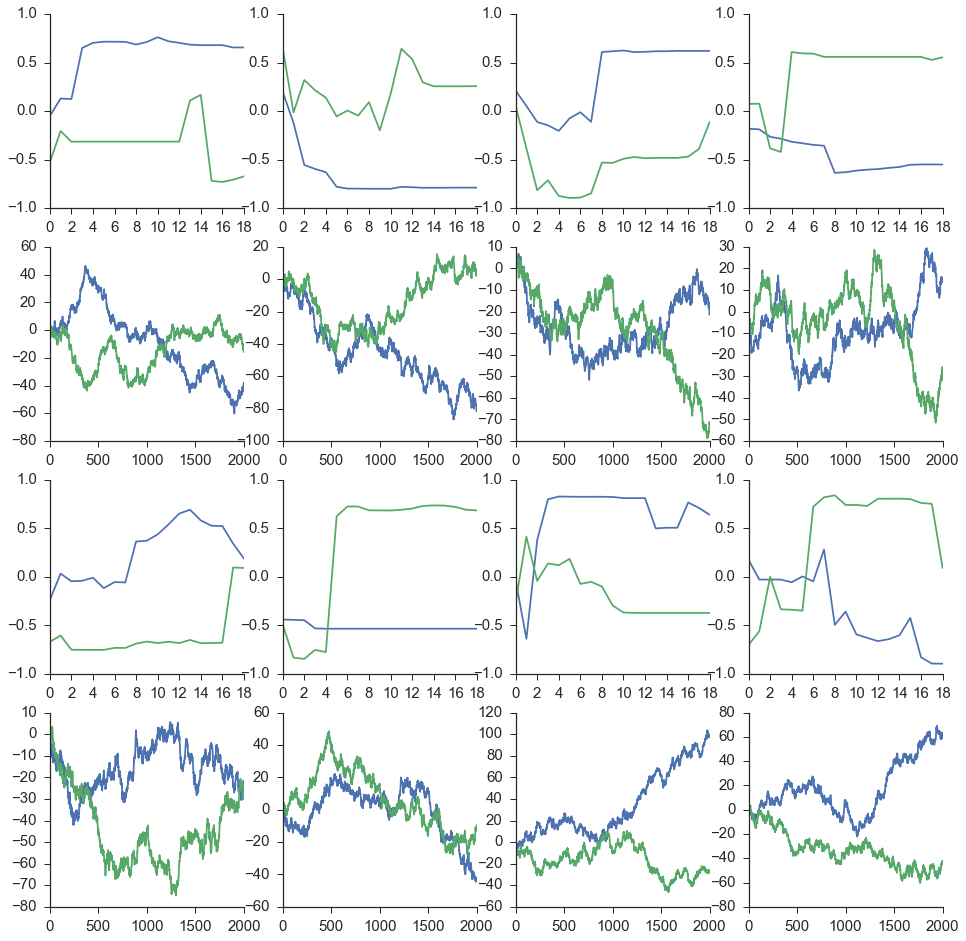

In [92]:
fig,axes = plt.subplots(4,4,figsize=(16,16))
ax = axes.ravel()
ts_list = [0,1,2,3,8,9,10,11]
c_list = [4,5,6,7,12,13,14,15]
for ii in range(8):
    ax[ts_list[ii]].plot(sc1[top_vals[ii],:])
    ax[ts_list[ii]].plot(sc2[top_vals[ii],:])
    ax[ts_list[ii]].set_ylim(-1.,1.)
    
    ax[c_list[ii]].plot(x1_store[top_vals[ii],:])
    ax[c_list[ii]].plot(x2_store[top_vals[ii],:])
sns.despine()

In [93]:
#fig.savefig('../figures/top_ccm_with_series.png',bbox_inches='tight')